# Bolt Take Home test 

**Goal:** Understand if our supply volume matches the demand that we have. If it does not, we need to pinpoint the peak hours and come up with recommended actions.

# Supply 



# Demand 



## Q1: Identify peak times of undersupply

## Q2: Calculate the number of online hours required to ensure that we have a good Coverage Ratio durin peak hours 

## Q3: Calculate how much earning we can guarantee so that we can attract more supply. 

In [151]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

supply = pd.read_csv("supply.csv")
demand = pd.read_csv("demand.csv")

# Supply

We define supply as the # of trips that are finished

In [152]:
supply.head()


,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23,52,18,6,11,0.3,0.67,12.0
1,2016-12-18 22,59,20,11,9,0.3,1.40,28.0
2,2016-12-18 21,72,25,7,18,0.3,0.64,16.0
3,2016-12-18 20,86,29,7,23,0.3,0.52,15.0
4,2016-12-18 19,82,31,14,17,0.4,1.16,36.0


In [153]:
supply.describe()

,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,795.000000
mean,61.603571,23.197619,6.308333,16.903571,0.370000,0.568786,14.764780
std,25.945275,11.101503,5.536652,9.068747,0.068214,0.386042,11.362529
min,9.000000,2.000000,0.000000,2.000000,0.100000,0.000000,1.000000
25%,41.000000,14.000000,2.000000,10.000000,0.300000,0.290000,6.000000
50%,63.000000,23.000000,5.000000,16.000000,0.400000,0.500000,12.000000
75%,80.250000,31.000000,9.000000,23.000000,0.400000,0.790000,20.000000
max,129.000000,56.000000,29.000000,48.000000,0.600000,2.030000,62.000000


In [154]:
supply['Date'] = pd.to_datetime(supply['Date'])
supply['Hour'] = supply['Date'].dt.hour
supply["Day of Week"] = supply['Date'].dt.dayofweek
supply["Is Weekend"] = supply['Date'].dt.dayofweek > 4
supply['Is Holyday'] = supply['Date'] > '2016-12-12'
supply['Date'] = supply['Date'].dt.date

#supply['Online time per driver'] = supply['Online (h)'] / supply['Active drivers']
#supply['Booking time per driver'] = supply['Has booking (h)'] / supply['Active drivers']
#supply['Waiting time per driver'] = supply['Waiting for booking (h)'] / supply['Active drivers']


supply['Driver Income'] = supply['Finished Rides'] * 10 * 0.8
supply['Revenue'] = supply['Finished Rides'] * 10 * 0.2


# Demand

We are defining demand as the numbers riders interested in taking a trip.

There are two groups in this category: 
- Riders that saw 0 cars
- Riders that saw +1 cars 

In [155]:
demand.head()


,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%)
0,2016-12-18 23,9,32,78
1,2016-12-18 22,29,64,69
2,2016-12-18 21,5,39,89
3,2016-12-18 20,13,48,79
4,2016-12-18 19,12,77,87


In [156]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date                         839 non-null    object
 1   People saw 0 cars (unique)   839 non-null    int64 
 2   People saw +1 cars (unique)  839 non-null    int64 
 3   Coverage Ratio (%)           839 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.3+ KB


In [157]:
demand.describe()

,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%)
count,839.000000,839.000000,839.000000
mean,12.240763,36.041716,75.661502
std,16.602303,25.160951,18.342403
min,0.000000,0.000000,0.000000
25%,3.000000,19.000000,66.000000
50%,6.000000,32.000000,80.000000
75%,14.000000,49.000000,89.000000
max,129.000000,172.000000,100.000000


In [158]:
demand['demand'] = demand['People saw 0 cars (unique)'] + demand['People saw +1 cars (unique)'] 
demand['Date'] = pd.to_datetime(demand['Date'])
demand['Hour'] = demand['Date'].dt.hour
demand["Day of Week"] = demand['Date'].dt.dayofweek
demand["Is Weekend"] = demand['Date'].dt.dayofweek > 4
demand['Is Holyday'] = demand['Date'] > '2016-12-12'
demand['Date'] = demand['Date'].dt.date


In [159]:
demand.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),demand,Hour,Day of Week,Is Weekend,Is Holyday
0,2016-12-18,9,32,78,41,23,6,True,True
1,2016-12-18,29,64,69,93,22,6,True,True
2,2016-12-18,5,39,89,44,21,6,True,True
3,2016-12-18,13,48,79,61,20,6,True,True
4,2016-12-18,12,77,87,89,19,6,True,True


<AxesSubplot:xlabel='Date'>

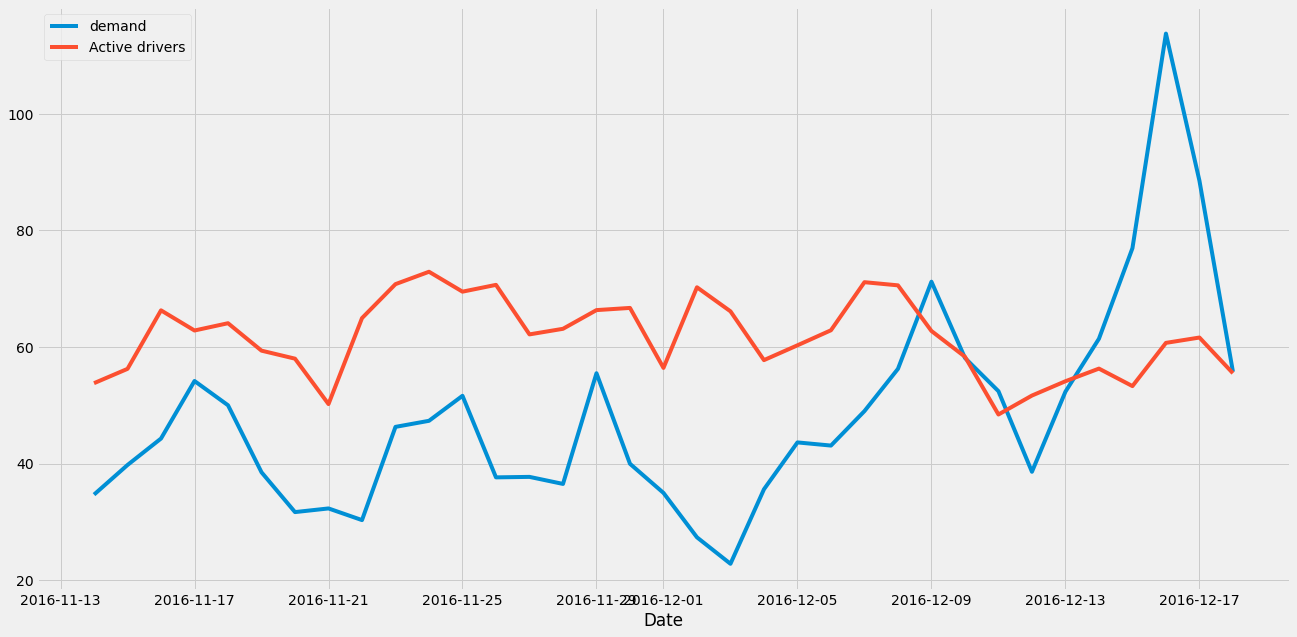

In [160]:
demand.groupby('Date')['demand'].mean().plot(legend=True)
supply.groupby('Date')['Active drivers'].mean().plot(legend=True, figsize=(20, 10))


As we look at the data as a whole, we are able to identify two periods with distinct behaviors: 

1. From Nov 14th until the beginning of December (first two weeks), where supply and demand follow similar trend over time 
2. The last week of the year shows a huge spike on Demand, probably due to the holiday season, while observing a decrease in Supply. 

We should distinguish these dates separately, because results can be skewed due to the holiday season.

## Supply-Demand Gap - Hourly 

<AxesSubplot:xlabel='Hour'>

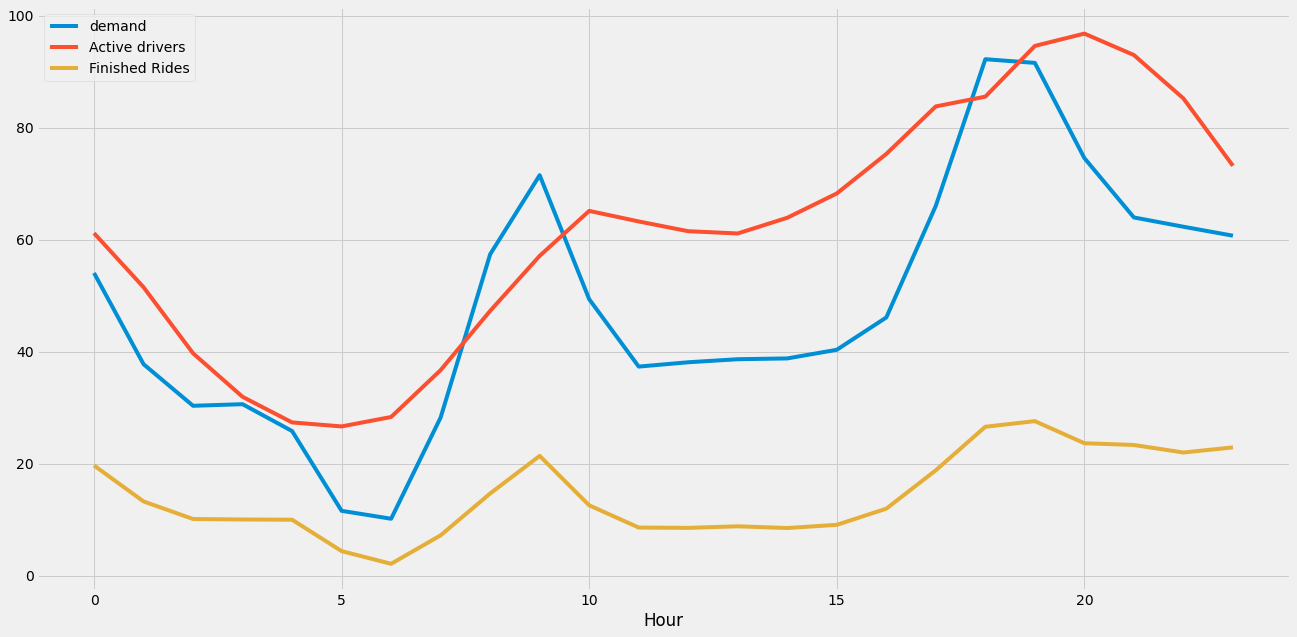

In [184]:
demand.groupby('Hour')['demand'].mean().plot(legend=True, figsize=(20,10))
supply.groupby('Hour')['Active drivers'].mean().plot(legend=True)
supply.groupby('Hour')['Finished Rides'].mean().plot(legend=True)

## Supply-Demand Gap - Daily 

<AxesSubplot:xlabel='Day of Week'>

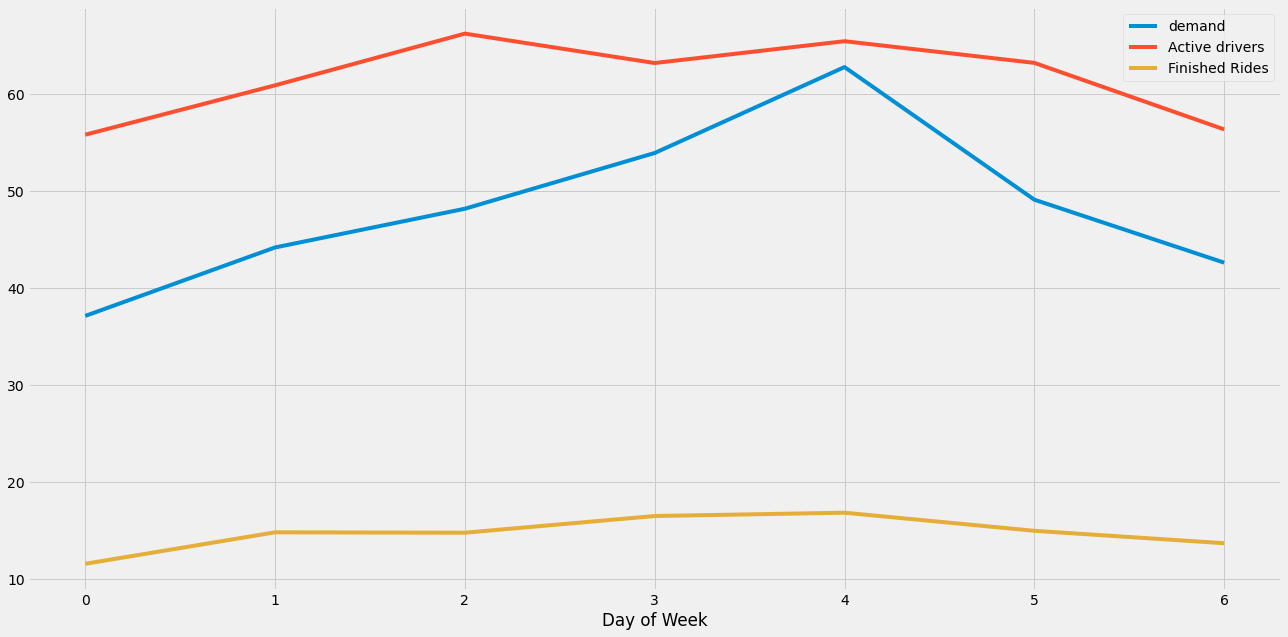

In [185]:
demand.groupby('Day of Week')['demand'].mean().plot(legend=True, figsize=(15,5))
supply.groupby('Day of Week')['Active drivers'].mean().plot(legend=True)
supply.groupby('Day of Week')['Finished Rides'].mean().plot(legend=True)

### Weekends - Hourly

<AxesSubplot:xlabel='Hour'>

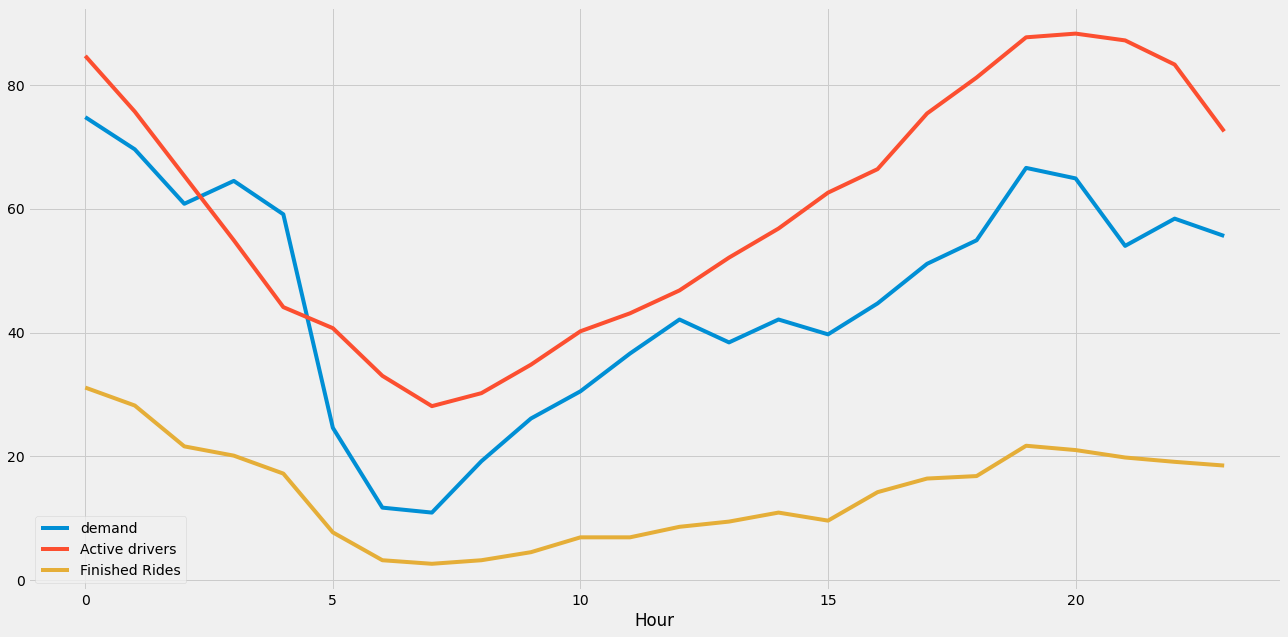

In [186]:
demand[demand['Is Weekend'] == True].groupby('Hour')['demand'].mean().plot(legend=True, figsize=(20,10))
supply[supply['Is Weekend'] == True].groupby('Hour')['Active drivers'].mean().plot(legend=True)
supply[supply['Is Weekend'] == True].groupby('Hour')['Finished Rides'].mean().plot(legend=True)

### Fridays

<AxesSubplot:xlabel='Hour'>

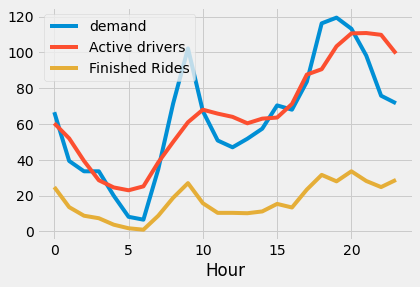

In [164]:
demand[demand['Day of Week'] == 4].groupby('Hour')['demand'].mean().plot(legend=True)
supply[supply['Day of Week'] == 4].groupby('Hour')['Active drivers'].mean().plot(legend=True)
supply[supply['Day of Week'] == 4].groupby('Hour')['Finished Rides'].mean().plot(legend=True)

### Holyday Season


<AxesSubplot:xlabel='Hour'>

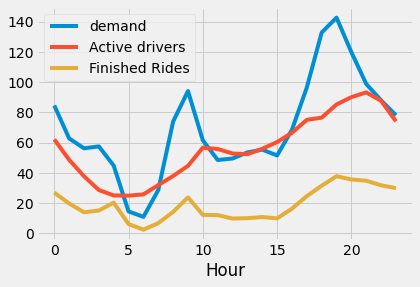

In [170]:
demand[demand['Is Holyday'] == True].groupby('Hour')['demand'].mean().plot(legend=True)
supply[supply['Is Holyday'] == True].groupby('Hour')['Active drivers'].mean().plot(legend=True)
supply[supply['Is Holyday'] == True].groupby('Hour')['Finished Rides'].mean().plot(legend=True)

<AxesSubplot:xlabel='Hour'>

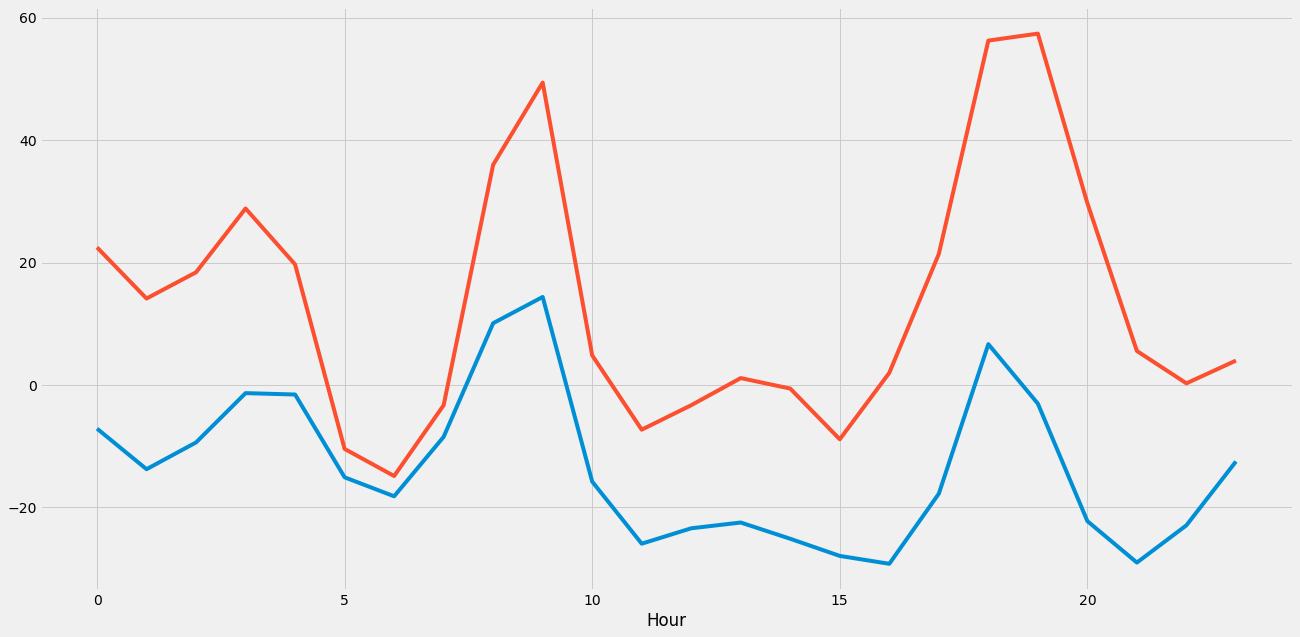

In [183]:
(demand.groupby('Hour')['demand'].mean() - supply.groupby('Hour')['Active drivers'].mean()).plot(figsize=(20,10))
#(demand[demand['Is Weekend'] == True].groupby('Hour')['demand'].mean() - supply[supply['Is Holyday'] == True].groupby('Hour')['Active drivers'].mean()).plot()
#(demand[demand['Day of Week'] == 4].groupby('Hour')['demand'].mean() - supply[supply['Day of Week'] == 4].groupby('Hour')['Active drivers'].mean()).plot()
(demand[demand['Is Holyday'] == True].groupby('Hour')['demand'].mean() - supply[supply['Is Holyday'] == True].groupby('Hour')['Active drivers'].mean()).plot()


## Q2

In [166]:
df = pd.concat([supply, demand], axis=1, join="inner")
df

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides,Hour,Day of Week,...,Revenue,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),demand,Hour,Day of Week,Is Weekend,Is Holyday
0,2016-12-18,52,18,6,11,0.3,0.67,12.0,23,6,...,24.0,2016-12-18,9,32,78,41,23,6,True,True
1,2016-12-18,59,20,11,9,0.3,1.40,28.0,22,6,...,56.0,2016-12-18,29,64,69,93,22,6,True,True
2,2016-12-18,72,25,7,18,0.3,0.64,16.0,21,6,...,32.0,2016-12-18,5,39,89,44,21,6,True,True
3,2016-12-18,86,29,7,23,0.3,0.52,15.0,20,6,...,30.0,2016-12-18,13,48,79,61,20,6,True,True
4,2016-12-18,82,31,14,17,0.4,1.16,36.0,19,6,...,72.0,2016-12-18,12,77,87,89,19,6,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,2016-11-14,16,6,1,5,0.4,0.50,3.0,5,0,...,6.0,2016-11-14,4,4,50,8,4,0,False,False
835,2016-11-14,15,6,0,6,0.4,0.00,NaN,4,0,...,NaN,2016-11-14,1,2,67,3,3,0,False,False
836,2016-11-14,18,7,0,7,0.4,0.00,NaN,3,0,...,NaN,2016-11-14,3,6,67,9,2,0,False,False
837,2016-11-14,21,7,0,7,0.3,0.14,1.0,2,0,...,2.0,2016-11-14,8,8,50,16,1,0,False,False


<AxesSubplot:xlabel='Hour'>

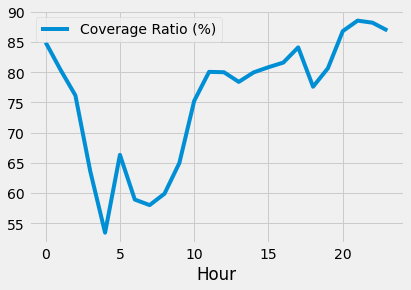

In [167]:
demand.groupby('Hour')['Coverage Ratio (%)'].mean().plot(legend=True)


<AxesSubplot:xlabel='Online (h)', ylabel='Coverage Ratio (%)'>

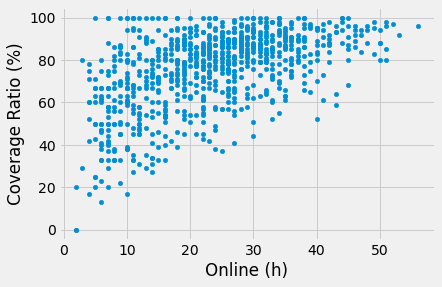

In [168]:
df.plot.scatter('Online (h)', 'Coverage Ratio (%)')